# Importing necessary libraries

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [75]:
data=pd.read_csv(r"credit (1).csv",encoding_errors="ignore")

# DATA UNDERSTANDING & EXPLORATORY DATA ANALYSIS

In [76]:
#To display the first five rows of the dataset
data.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [77]:
#To find the number of rows and columns in the dataset
data.shape

(100000, 28)

In [78]:
#To find the column names
data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [79]:
#To get informations such as number of columns,column names,number of non-null cells in each column,datatype of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [80]:
#To get statistical summary of numerical columns
data.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [81]:
data = data.drop_duplicates()

# Visualization of the Dataset

<function matplotlib.pyplot.show(close=None, block=None)>

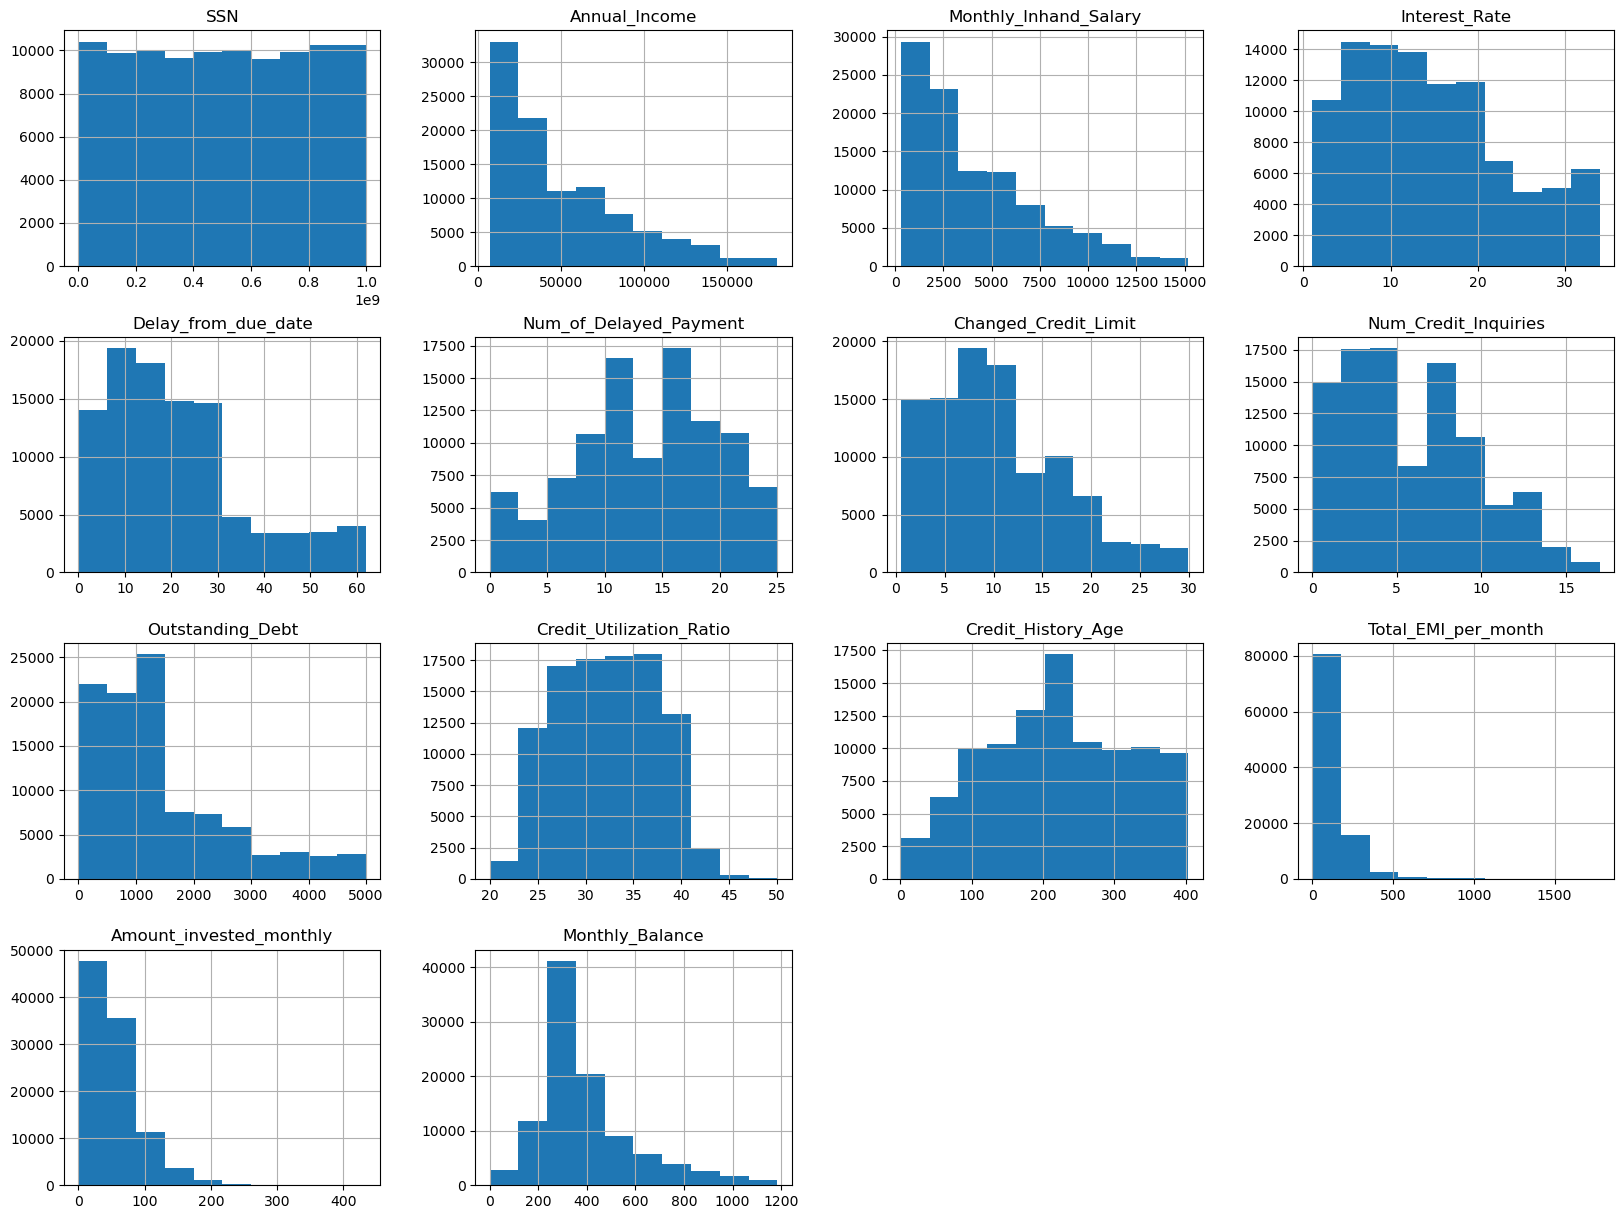

In [89]:
#Plotting histogram to analyse the distribution of some relevent numerical features
col=data[[ 'SSN','Annual_Income', 'Monthly_Inhand_Salary',  'Interest_Rate', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance',
       'Credit_Score']]
col.hist(figsize=(20,15))
plt.show

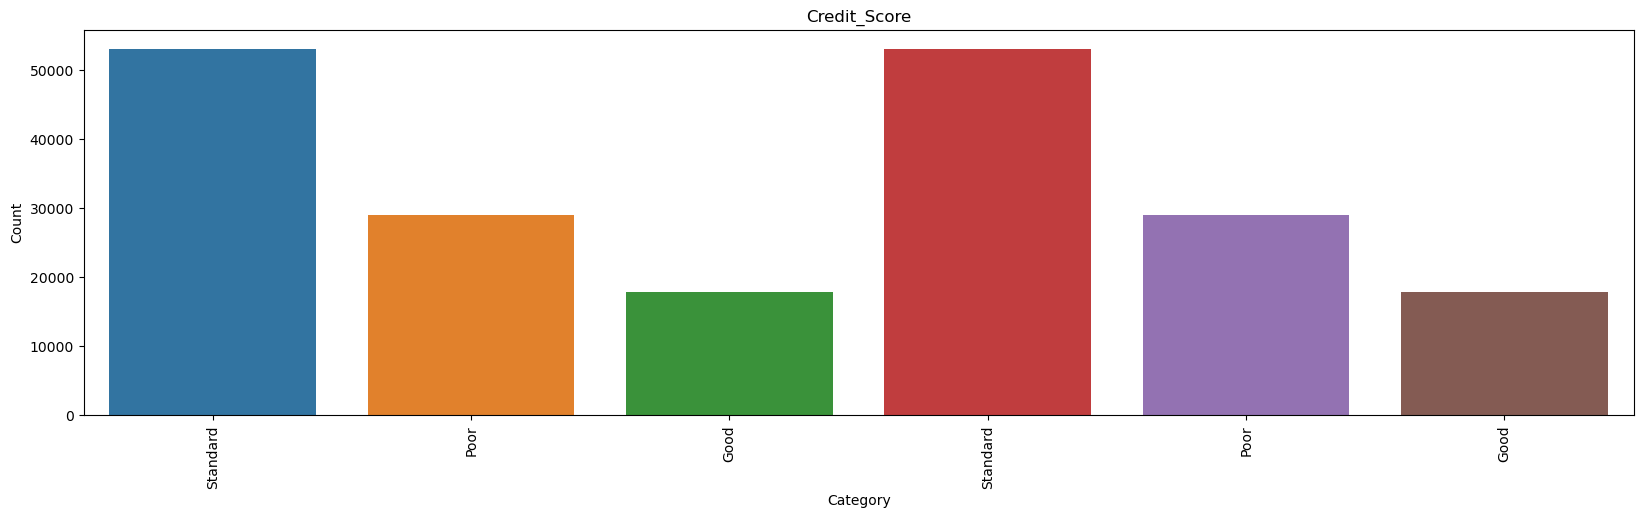

In [90]:
# Bar plot for Credit Score Distribution
plt.figure(figsize = (20,5))
a = data['Credit_Score'].value_counts(ascending = False)
order = list(a.index[:9]) + list(a.index[-14:])
sns.countplot(data = data, x = 'Credit_Score', order = order)
plt.xticks(rotation = 90);
plt.title('Credit_Score')
plt.ylabel('Count');
plt.xlabel('Category');

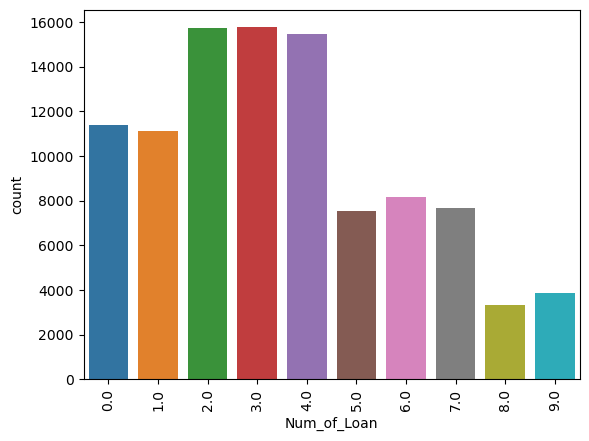

In [11]:
sns.countplot(x='Num_of_Loan',data=data)
plt.xticks(rotation=90)
plt.show()

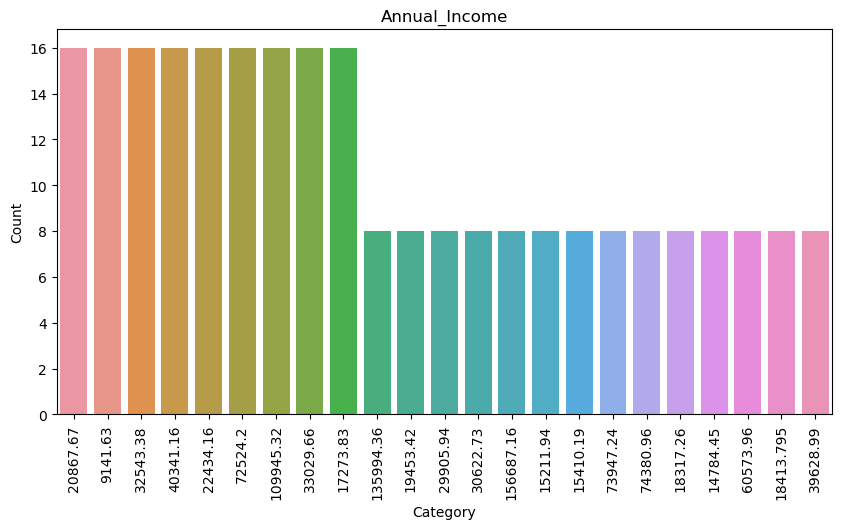

In [12]:
# Bar plot for Annual Income Distribution
plt.figure(figsize = (10,5))
a = data['Annual_Income'].value_counts(ascending = False)
order = list(a.index[:9]) + list(a.index[-14:])
sns.countplot(data = data, x = 'Annual_Income', order = order)
plt.xticks(rotation = 90);
plt.title('Annual_Income')
plt.ylabel('Count');
plt.xlabel('Category');

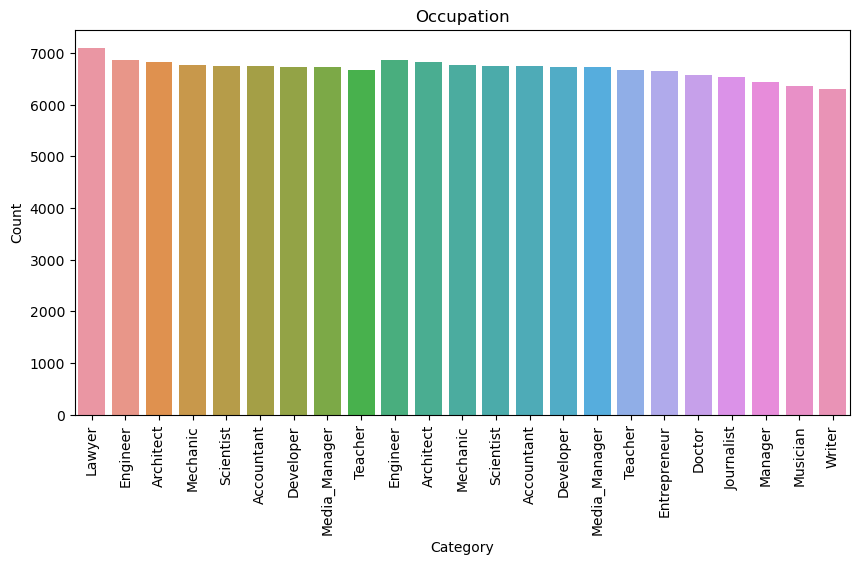

In [13]:
# Bar plot for Occupation Distribution
plt.figure(figsize = (10,5))
a = data['Occupation'].value_counts(ascending = False)
order = list(a.index[:9]) + list(a.index[-14:])
sns.countplot(data = data, x = 'Occupation', order = order)
plt.xticks(rotation = 90);
plt.title('Occupation')
plt.ylabel('Count');
plt.xlabel('Category');

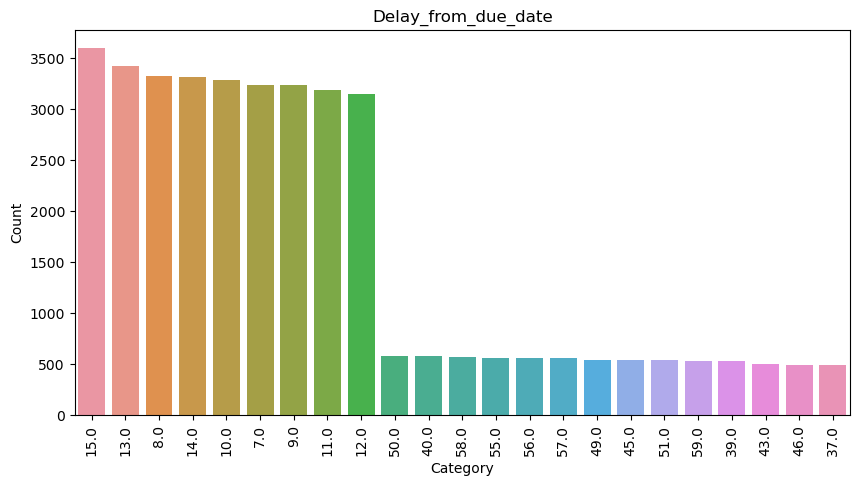

In [14]:
# Bar plot for Delay from due date Distribution
plt.figure(figsize = (10,5))
a = data['Delay_from_due_date'].value_counts(ascending = False)
order = list(a.index[:9]) + list(a.index[-14:])
sns.countplot(data = data, x = 'Delay_from_due_date', order = order)
plt.xticks(rotation = 90);
plt.title('Delay_from_due_date')
plt.ylabel('Count');
plt.xlabel('Category');

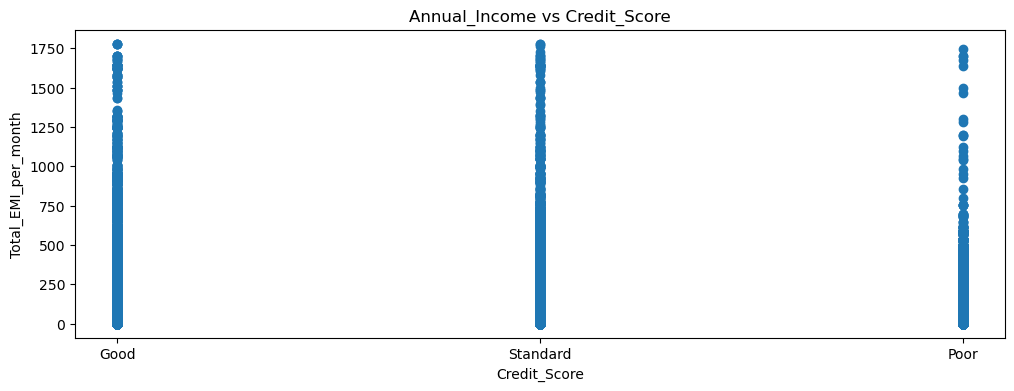

In [15]:
fig, ax = plt.subplots(1,figsize=(12, 4))
plt.scatter(x=data['Credit_Score'], y=data['Total_EMI_per_month'])
ax.set(title='Annual_Income vs Credit_Score', xlabel='Credit_Score', ylabel='Total_EMI_per_month')
plt.show()


# Distribution of annual income by Credit Score

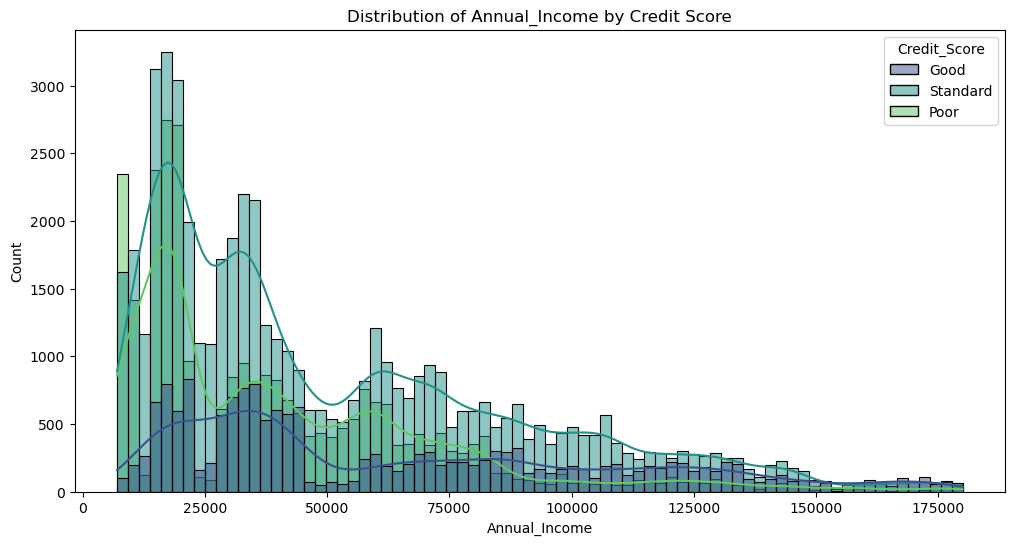

In [16]:
plt.figure(figsize=(12, 6))
sns.histplot(data, x='Annual_Income', hue='Credit_Score', kde=True, palette='viridis')
plt.title('Distribution of Annual_Income by Credit Score')
plt.xlabel('Annual_Income')
plt.ylabel('Count')
plt.show()

# Credit Score Distribution by Occupation

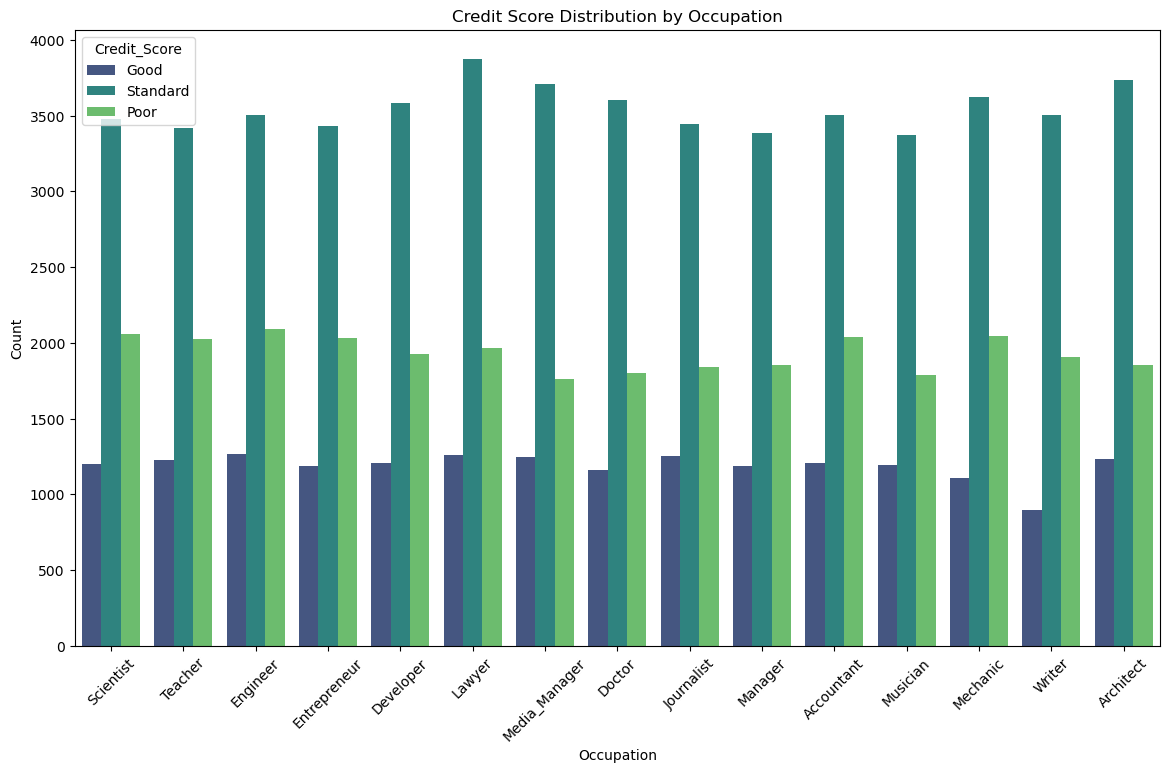

In [17]:
plt.figure(figsize=(14, 8))
sns.countplot(data=data, x='Occupation', hue='Credit_Score', palette='viridis')
plt.title('Credit Score Distribution by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Payment Behavior Distribution by Credit Score

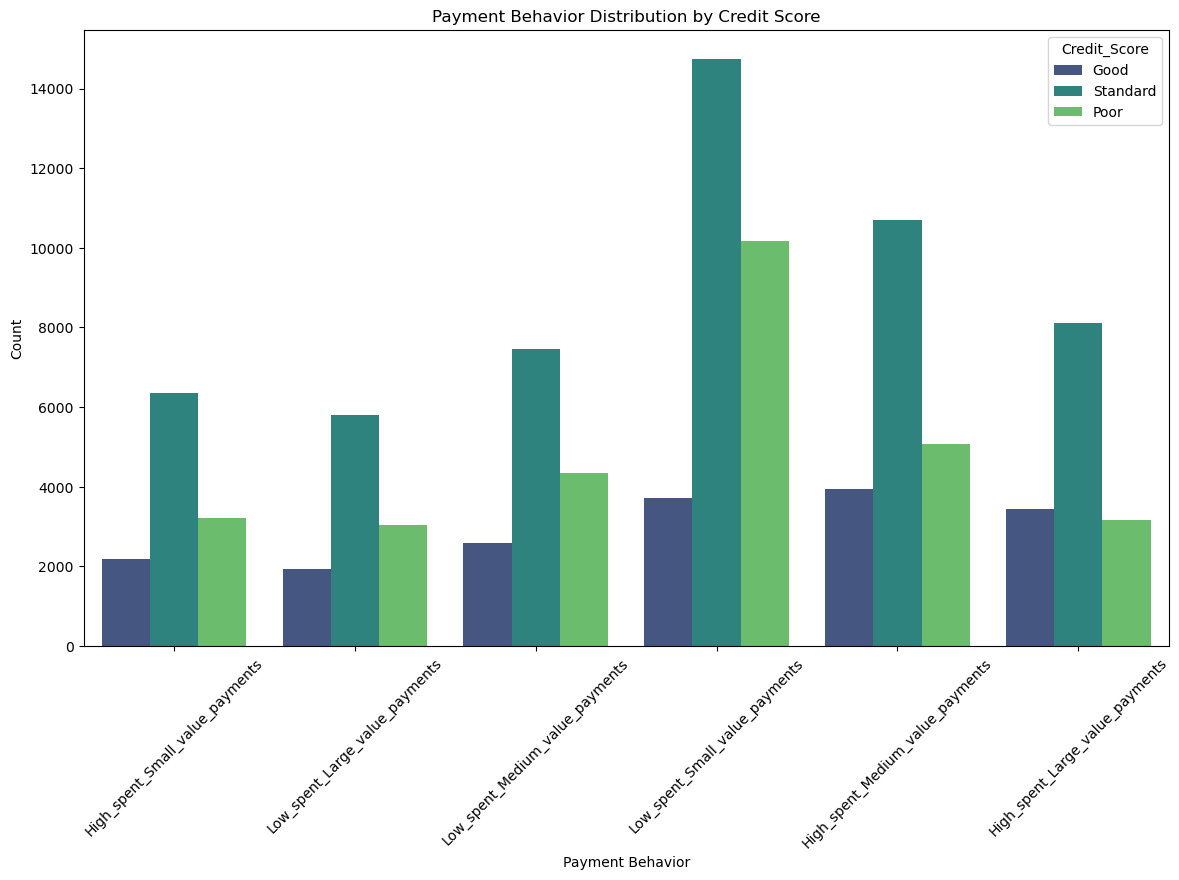

In [18]:
plt.figure(figsize=(14, 8))
sns.countplot(data=data, x='Payment_Behaviour', hue='Credit_Score', palette='viridis')
plt.title('Payment Behavior Distribution by Credit Score')
plt.xlabel('Payment Behavior')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# DATA PREPROCESSING

# Missing Value Detection

In [19]:
#Checking for null values
data.isna().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

# Outlier Detection

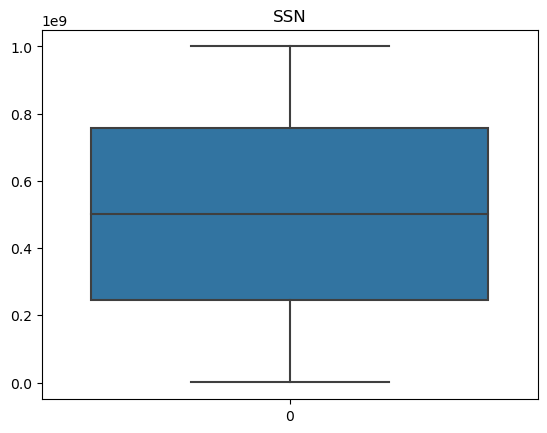

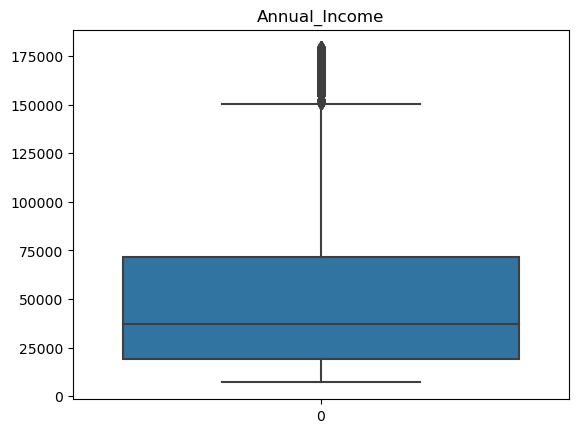

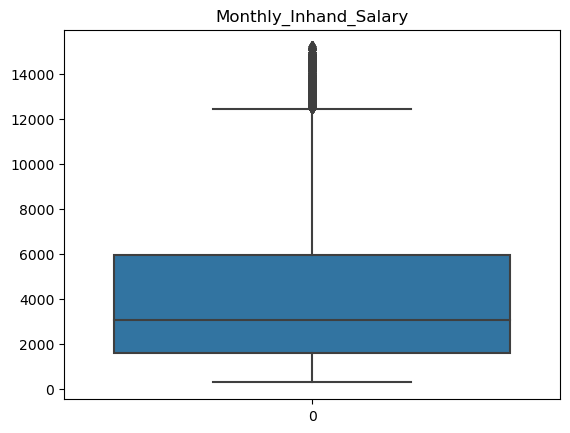

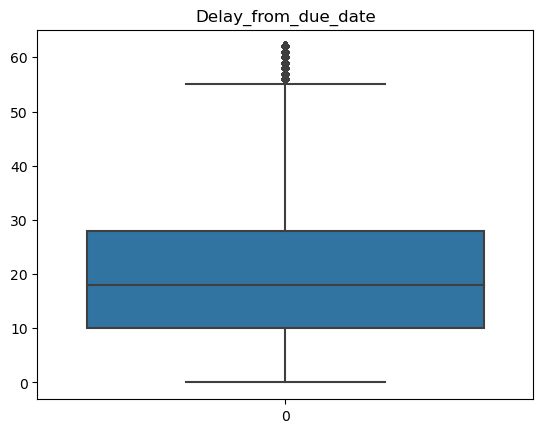

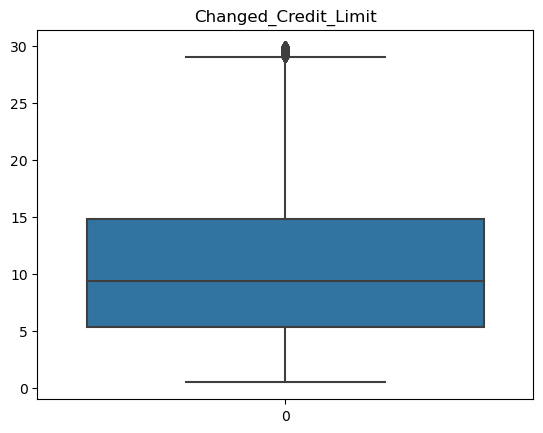

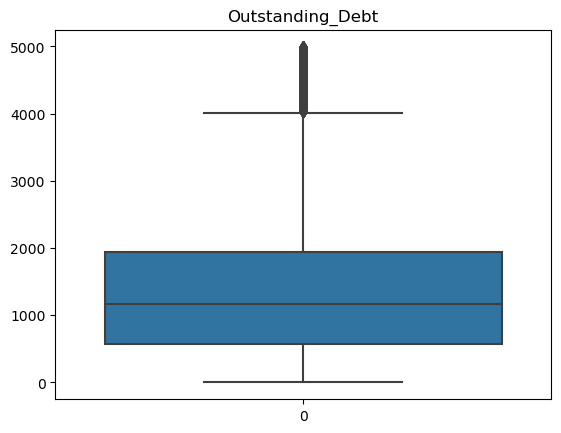

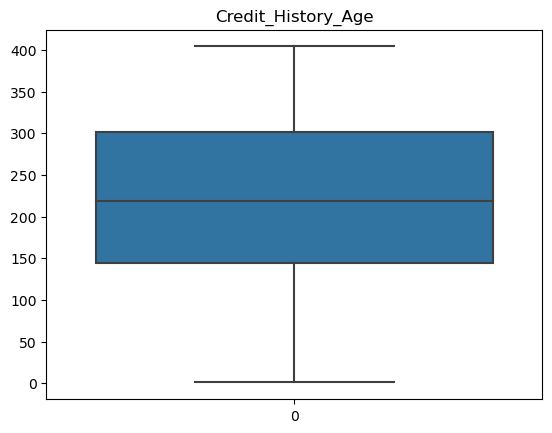

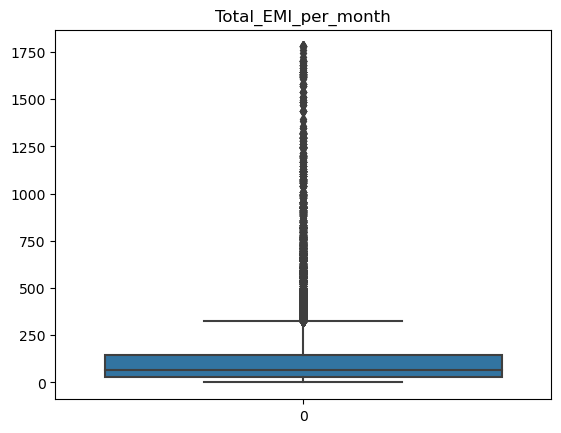

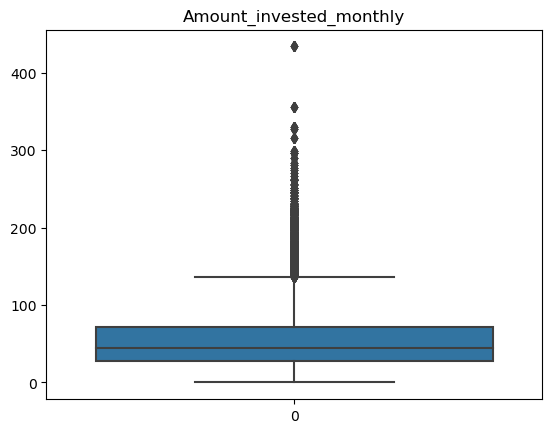

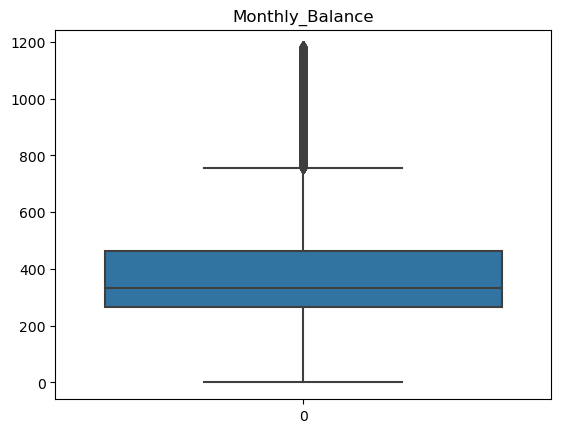

In [20]:
col=[ 'SSN','Annual_Income', 'Monthly_Inhand_Salary', 'Delay_from_due_date', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Credit_History_Age', 'Total_EMI_per_month','Amount_invested_monthly', 'Monthly_Balance']
for i in col:
    plt.figure()
    sns.boxplot(data[i])
    plt.title(i)
plt.show()

In [21]:
data.drop(['Customer_ID', 'Name','ID'],inplace=True,axis=1 )

In [22]:
data ['Type_of_Loan'].value_counts()

No Data                                                                                                                               11408
Not Specified                                                                                                                          1408
Credit-Builder Loan                                                                                                                    1280
Personal Loan                                                                                                                          1272
Debt Consolidation Loan                                                                                                                1264
                                                                                                                                      ...  
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                  8
Payday Loan, Mortgag

In [23]:
loan_type_data = list(data['Type_of_Loan'])
loan_type_data

['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan,

In [24]:
#Create a dictionary to store the counts of all the various loan types

loan_type_dict = dict()
for value in loan_type_data:
    values = value.split(',')
    for each_value in values:
        loan_type = each_value.strip(' ')
        if 'and' in loan_type:
            loan_type = loan_type[4 : ]
        if loan_type in loan_type_dict:
            loan_type_dict[loan_type] += 1
        else:
            loan_type_dict[loan_type] = 1

loan_type_dict

{'Auto Loan': 37992,
 'Credit-Builder Loan': 40440,
 'Personal Loan': 38888,
 'Home Equity Loan': 39104,
 'Not Specified': 39616,
 'No Data': 11408,
 'Mortgage Loan': 38936,
 'Student Loan': 38968,
 'Debt Consolidation Loan': 38776,
 'Payday Loan': 40568}

In [25]:
#Creating 8 different lists for each loan type

auto_loan = [0] * (len(data))
credit_builder_loan = [0] * (len(data))
personal_loan = [0] * (len(data))
home_equity_loan = [0] * (len(data))
mortgage_loan = [0] * (len(data))
student_loan = [0] * (len(data))
debt_consolidation_loan = [0] * (len(data))
payday_loan = [0] * (len(data))

In [26]:
#Using 0's and 1's if a customer has a particular loan

for index in range(len(loan_type_data)):
    #For Auto Loan
    if 'Auto' in loan_type_data[index]:
        auto_loan[index] = 1
    
    #For Credit Builder Loan
    if 'Credit-Builder' in loan_type_data[index]:
        credit_builder_loan[index] = 1
        
    #For Personal Loan
    if 'Personal' in loan_type_data[index]:
        personal_loan[index] = 1
    
    #For Home Equity Loan
    if 'Home' in loan_type_data[index]:
        home_equity_loan[index] = 1
    
    #For Mortgage Loan
    if 'Mortgage' in loan_type_data[index]:
        mortgage_loan[index] = 1
    
    #For Student Loan
    if 'Student' in loan_type_data[index]:
        student_loan[index] = 1
        
    #For Debt Consolidation loan
    if 'Debt' in loan_type_data[index]:
        debt_consolidation_loan[index] = 1
    
    #For Payday loan
    if 'Payday' in loan_type_data[index]:
        payday_loan[index] = 1

In [27]:
#Adding the new columns to the dataset

data['Auto_Loan'] = auto_loan
data['Credit_Builder_Loan'] = credit_builder_loan
data['Personal_Loan'] = personal_loan
data['Home_Enquity_Loan'] = home_equity_loan
data['Mortgage_Loan'] = mortgage_loan
data['Student_Loan'] = student_loan
data['Debt_Consolidation_Loan'] = debt_consolidation_loan
data['Payday_Loan'] = payday_loan

In [28]:
#Removing the column - Type_of_loan

data.drop(['Type_of_Loan'], axis = 1, inplace = True)

In [29]:
### Balancing - Occupation
occupation_count = data['Occupation'].value_counts(dropna = False)
occupation_count

Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: Occupation, dtype: int64

# Checking Correlation

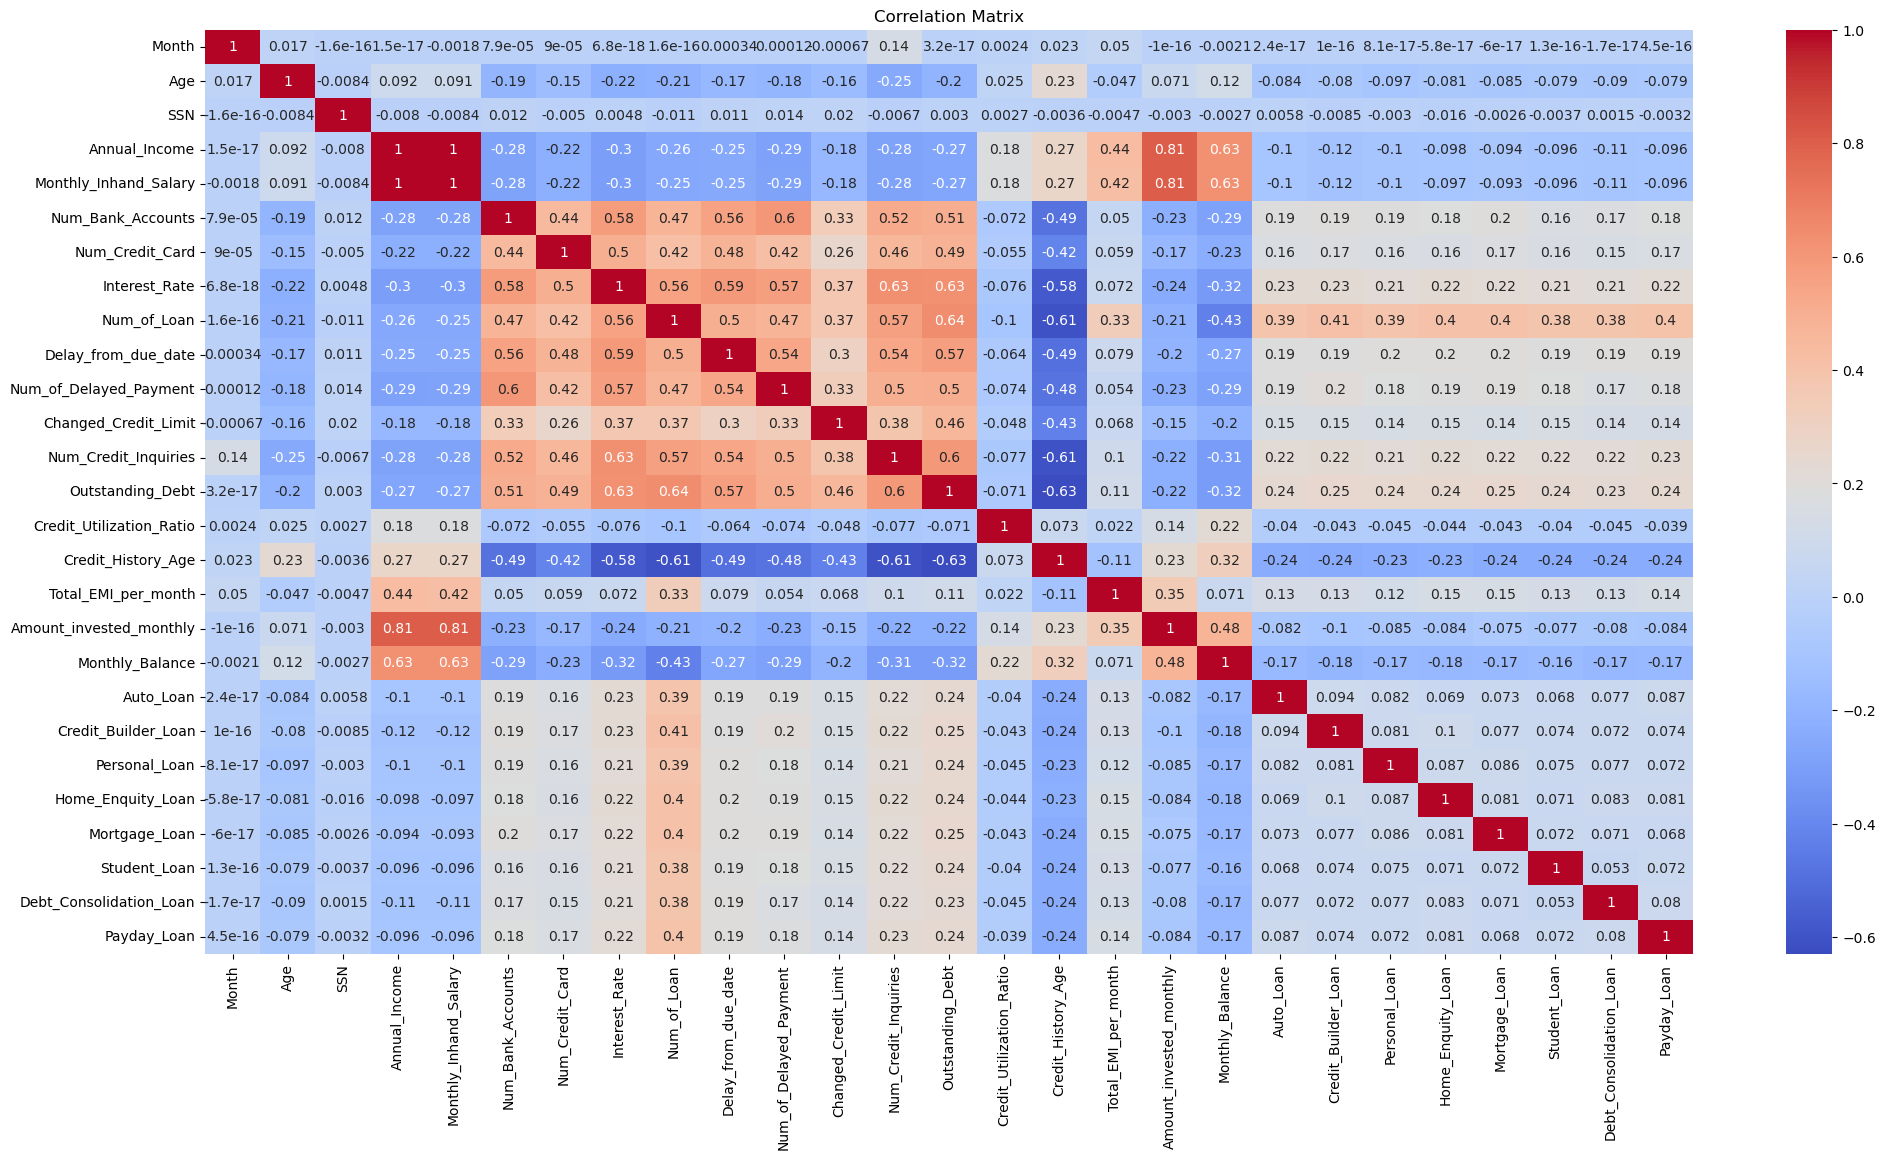

In [30]:
plt.figure(figsize=(24,12))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Normalization

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
col_float = ['Age', 'Annual_Income', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
             'Outstanding_Debt', 'Credit_History_Age', 'Total_EMI_per_month', 'Monthly_Balance']

# Assuming 'data' is your DataFrame
for i in col_float:
    data[i] = scaler.fit_transform(data[[i]])

data.head()

,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Monthly_Balance,Credit_Score,Auto_Loan,Credit_Builder_Loan,Personal_Loan,Home_Enquity_Loan,Mortgage_Loan,Student_Loan,Debt_Consolidation_Loan,Payday_Loan
0,1,0.214286,821000265.0,Scientist,0.069997,1824.843333,3.0,4.0,3.0,4.0,...,0.263941,Good,1,1,1,1,0,0,0,0
1,2,0.214286,821000265.0,Scientist,0.069997,1824.843333,3.0,4.0,3.0,4.0,...,0.240405,Good,1,1,1,1,0,0,0,0
2,3,0.214286,821000265.0,Scientist,0.069997,1824.843333,3.0,4.0,3.0,4.0,...,0.279750,Good,1,1,1,1,0,0,0,0
3,4,0.214286,821000265.0,Scientist,0.069997,1824.843333,3.0,4.0,3.0,4.0,...,0.188731,Good,1,1,1,1,0,0,0,0
4,5,0.214286,821000265.0,Scientist,0.069997,1824.843333,3.0,4.0,3.0,4.0,...,0.288432,Good,1,1,1,1,0,0,0,0


# Encoding

In [32]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
label_encoders={}
to_encode=[ 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',  'Payment_Behaviour','Credit_Score']
for col in to_encode:
    data[col]=le.fit_transform(data[col])
    label_encoders[col]=dict(zip(le.classes_,le.transform(le.classes_)))

In [33]:
#Finding highly correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [34]:
corr_features = correlation(data, 0.6)
len(set(corr_features))

6

In [35]:
corr_features

{'Amount_invested_monthly',
 'Monthly_Balance',
 'Monthly_Inhand_Salary',
 'Num_Credit_Inquiries',
 'Num_of_Delayed_Payment',
 'Outstanding_Debt'}

In [36]:
x=data.drop(['Credit_Score'],axis=1)
y=data['Credit_Score']

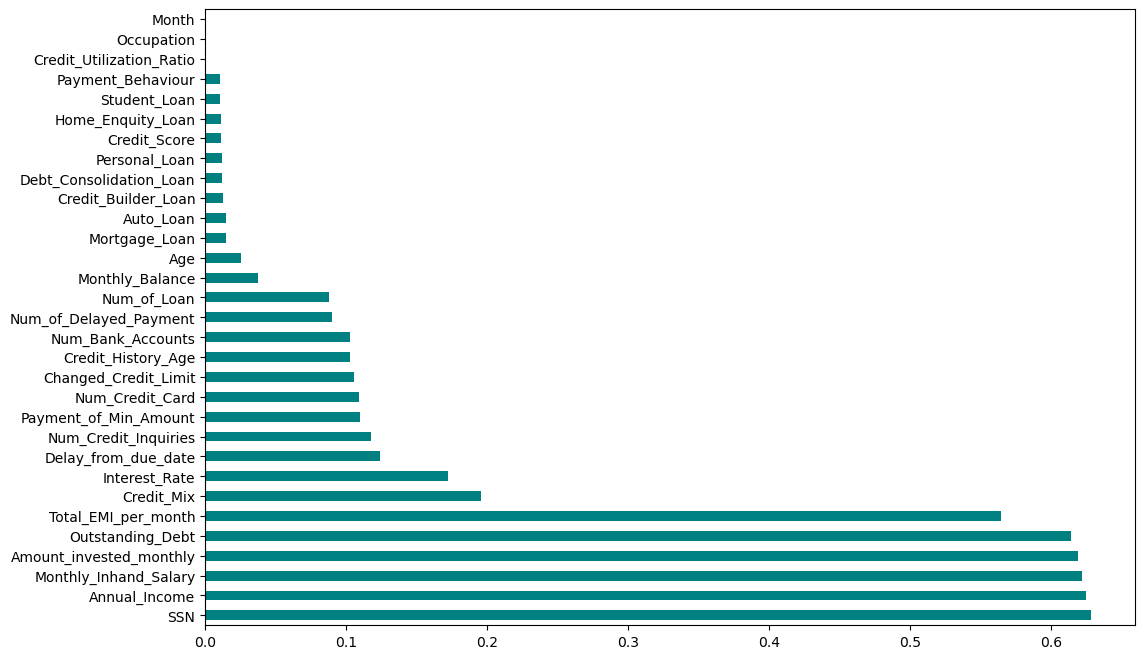

In [37]:
from sklearn.feature_selection import mutual_info_classif
importances=mutual_info_classif(x,y)
feat_importances=pd.Series(importances,data.columns[0:len(data.columns)-1]).sort_values(ascending=False)
plt.figure(figsize = (12,8))
feat_importances.plot(kind='barh',color='teal')
plt.show()

# BUILDING CLASSIFICATION MODELS

# Defining the dependent and independent variables

In [38]:
x=data[[ 'Month', 'Age', 'SSN', 'Occupation','Auto_Loan','Credit_Builder_Loan','Personal_Loan','Home_Enquity_Loan',
        'Mortgage_Loan','Student_Loan','Debt_Consolidation_Loan','Payday_Loan','Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt','Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month','Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance']]
y=data['Credit_Score']

In [39]:
#Standardizing the features
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
X=std_scaler.fit_transform(x)
X=pd.DataFrame(x)


# Splitting the data into train data and test data

In [40]:
#Splitting the data in such a way that 80% data is for training and 25% is for testing
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

# LOGISTIC REGRESSION

# Model Training

In [41]:
#Defining and training(fitting) the logistic regression model using train data
from sklearn import linear_model
lr=linear_model.LogisticRegression()
lr_model=lr.fit(x_train,y_train)

In [42]:
#Predicting the output for the test data using the fitted model
lr_pred=lr_model.predict(x_test)

# Model Evaluation

In [43]:
print("Confusion matrix : \n",confusion_matrix(y_test,lr_pred))

Confusion matrix : 
 [[    0     0  3527]
 [    0     0  5874]
 [    0     0 10599]]


In [44]:
#Evaluating the model using the metric accuracy score
lr_acc=accuracy_score(y_test,lr_pred)
print("Accuracy score :",lr_acc)

Accuracy score : 0.52995


# GAUSSIAN NAIVE BAYES

# Model Training

In [45]:
from sklearn.naive_bayes import GaussianNB
gu_class = GaussianNB()
gu_model= gu_class.fit(x_train,y_train)

In [46]:
#Predicting the output for the test data using the fitted model
y_pred_Gaus=gu_model.predict(x_test)

# Model Evaluation

In [47]:
#Evaluating the model using confusion matrix
print("Confusion matrix : \n",confusion_matrix(y_test,y_pred_Gaus))

Confusion matrix : 
 [[    0     0  3527]
 [    0     0  5874]
 [    0     0 10599]]


In [48]:
#Evaluating the model using the metric accuracy score
gaus_acc=accuracy_score(y_test,y_pred_Gaus)
print("Accuracy score :",gaus_acc)

Accuracy score : 0.52995


# EXTRA TREES CLASSIFIER

# Model Training

In [49]:
from sklearn.ensemble import ExtraTreesClassifier
xt_cls=ExtraTreesClassifier()
xt_model=xt_cls.fit(x_train,y_train)

In [50]:
#Predicting the output for the test data using the fitted model
y_pred_xt=xt_model.predict(x_test)

# Model Evaluation

In [51]:
#Evaluating the model using confusion matrix
print("Confusion matrix : \n",confusion_matrix(y_test,y_pred_xt))

Confusion matrix : 
 [[2799    0  728]
 [   2 5012  860]
 [ 653 1089 8857]]


In [52]:
#Evaluating the model using the metric accuracy score
xt_acc=accuracy_score(y_test,y_pred_xt)
print("Accuracy score :",xt_acc)

Accuracy score : 0.8334


# RANDOM FOREST CLASSIFIER

# Model Training

In [53]:
#Defining and training(fitting) the decion tree model using train data
from sklearn.ensemble import RandomForestClassifier
rf_cls=RandomForestClassifier()
model_rf=rf_cls.fit(x_train,y_train)

In [54]:
#Predicting the output for the test data using the fitted model
y_pred_rf=model_rf.predict(x_test)

# Model Evaluation

In [55]:
#Evaluating the model using confusion matrix
print("Confusion matrix : \n",confusion_matrix(y_test,y_pred_rf))

Confusion matrix : 
 [[2832   12  683]
 [  24 5081  769]
 [ 660 1134 8805]]


In [56]:
#Evaluating the model using the metric accuracy score
rf_acc=accuracy_score(y_test,y_pred_rf)
print("Accuracy score :",rf_acc)

Accuracy score : 0.8359


# DECISION TREE

# Model Training

In [57]:
#Defining and training(fitting) the decion tree model using train data
from sklearn.tree import DecisionTreeClassifier
dt_cls=DecisionTreeClassifier()
dt_model=dt_cls.fit(x_train,y_train)

In [58]:
#Predicting the output for the test data using the fitted model
y_pred_dt=dt_model.predict(x_test)

# Model Evaluation

In [59]:
#Evaluating the model using confusion matrix
print("Confusion matrix : \n",confusion_matrix(y_test,y_pred_dt))

Confusion matrix : 
 [[2396  120 1011]
 [  96 4254 1524]
 [ 938 1465 8196]]


In [60]:
#Evaluating the model using the metric accuracy score
dt_acc=accuracy_score(y_test,y_pred_dt)
print("Accuracy score :",dt_acc)

Accuracy score : 0.7423


# Comparing the performance of all the models

In [61]:

# Multiply accuracy scores by 100 to convert them to percentages
lr_acc_percent = lr_acc * 100
dt_acc_percent = dt_acc * 100
rf_acc_percent = rf_acc * 100
xt_acc_percent = xt_acc * 100
gaus_acc_percent = gaus_acc * 100

# Create a DataFrame with model names and accuracy scores in percentages
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Extra Trees', 'Gaussian NB'],
    'Accuracy Score in %': [lr_acc_percent, dt_acc_percent, rf_acc_percent, xt_acc_percent, gaus_acc_percent]
})

# Sort the DataFrame by accuracy score in descending order
results = results.sort_values(by='Accuracy Score in %', ascending=False)

# Set the 'Model' column as the index
results = results.set_index('Model')

# Display the DataFrame
print(results)


                     Accuracy Score in %
Model                                   
Random Forest                     83.590
Extra Trees                       83.340
Decision Tree                     74.230
Logistic Regression               52.995
Gaussian NB                       52.995


# Hyperparametric Tuning(Extra Trees)

In [62]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

In [63]:
# Initialize GridSearchCV with extra trees model and parameter grid
grid_search_xt = GridSearchCV(xt_cls, param_grid, cv=5, scoring='accuracy')

In [64]:
# Fit the model to the training data
grid_search_xt.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'max_depth': [None, 5], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

In [65]:
# Get the best parameters from the grid search
best_params = grid_search_xt.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [66]:
# Use the best model to make predictions on the test set
best_model = grid_search_xt.best_estimator_
y_pred_xt_grid = best_model.predict(x_test)

In [70]:
# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred_xt_grid)
print("Accuracy on Test Set:", accuracy)

Accuracy on Test Set: 0.83205


# Hyperparametric Tuning(Random Forest)

In [106]:
# Create a Random Forest Classifier
rf_cls = RandomForestClassifier()

In [107]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

In [108]:
# Initialize GridSearchCV with random forest model and parameter grid
grid_search_rf = GridSearchCV(rf_cls, param_grid, cv=5, scoring='accuracy')

In [109]:
# Fit the model to the training data
grid_search_rf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

In [110]:
# Get the best parameters from the grid search
best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters:", best_params_rf)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [111]:
# Use the best model to make predictions on the test set
best_model_rf = grid_search_rf.best_estimator_
y_pred_rf_grid = best_model_rf.predict(x_test)

In [112]:
# Evaluate the model performance
accuracy_rf = accuracy_score(y_test, y_pred_rf_grid)
print("Accuracy on Test Set:", accuracy_rf)

Accuracy on Test Set: 0.8378


# Cross validation(Random Forest)

In [69]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
scores = cross_val_score(rf_cls, x_train, y_train, cv=5)

In [70]:
# Print the cross-validation scores
print("Cross-validation scores:", scores)

Cross-validation scores: [0.83025   0.8295625 0.824625  0.8240625 0.8240625]


In [71]:
# Print the mean and standard deviation of the cross-validation scores
print("Mean accuracy:", scores.mean())
print("Standard deviation of accuracy:", scores.std())

Mean accuracy: 0.8265125000000001
Standard deviation of accuracy: 0.002787079564705669
